In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mums_age = pd.read_excel('../Data/2021girlsnames.xlsx', sheet_name='8', skiprows=6)
mums_age = mums_age.head(10)
mums_age.columns = [col.replace('\n', ' ').replace('  ', ' ') for col in mums_age.columns]

8
6
7


In [3]:
all_names = set(
    list(mums_age['Aged under 25 Name']) + 
    list(mums_age['Aged 25 to 29 Name']) +
    list(mums_age['Aged 30 to 34 Name']) +
    list(mums_age['Aged 35 and over Name']))

In [4]:
all_names = ['Amelia', 'Olivia', 'Ava', 'Isla', 'Ivy', 'Willow', 'Isabella', 'Harper', 'Delilah', 'Freya', 'Elsie', 'Rosie', 'Lily', 'Mia', 'Florence', 'Charlotte', 'Emily', 'Sophia', 'Sophie', 'Grace']

In [5]:
_under_25 = dict(zip(mums_age['Aged under 25 Name'], mums_age['Aged under 25 Rank']))
_25_to_29 = dict(zip(mums_age['Aged 25 to 29 Name'], mums_age['Aged 25 to 29 Rank']))
_30_to_34 = dict(zip(mums_age['Aged 30 to 34 Name'], mums_age['Aged 30 to 34 Rank']))
_35_and_over = dict(zip(mums_age['Aged 35 and over Name'], mums_age['Aged 35 and over Rank']))

In [6]:
names = []

for name in all_names:
    for my_dict in [_under_25, _25_to_29, _30_to_34, _35_and_over]:
        if name not in my_dict.keys():
            my_dict[name] = np.nan
    
    
    name_dict = {}
    name_dict['Name'] = [name for i in range(4)]
    name_dict['Categories'] = ['Aged under 25', 'Aged 25 to 29', 'Aged 30 to 34', 'Aged 35 and over']
    
    
    name_dict['Rank'] = [_under_25[name], _25_to_29[name], _30_to_34[name], _35_and_over[name]]
    names.append(name_dict)

In [7]:
grey_names = ['Willow', 'Isabella', 'Harper', 'Delilah', 'Elsie', 'Sophia', 'Emily', 'Charlotte', 'Sophie', 'Grace']

In [8]:
enmax_palette = ["#E30B5C", "#FF69B4", "#DA70D6", "#FAA0A0", "#800080", 
                "#E30B5C", "#FF69B4", "#DA70D6", "#FAA0A0", "#800080",
                "#E30B5C", "#FF69B4", "#DA70D6", "#FAA0A0", "#800080",]

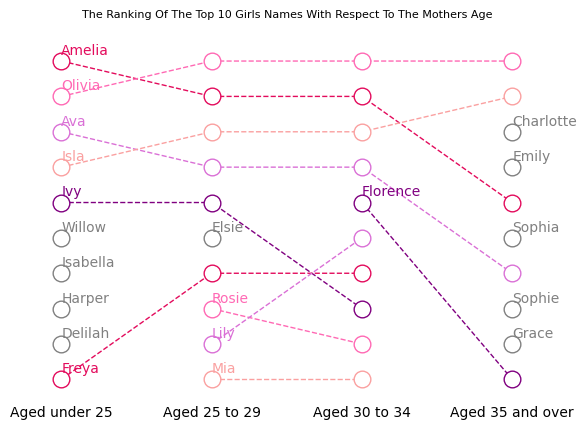

In [13]:
fig, ax = plt.subplots()
#plt.rcParams["figure.figsize"] = (12,6.5)
n=0

for element in names:
    
    if element['Name'][0] in grey_names:
        #print(element)
        p = ax.plot(element["Categories"], 
              element["Rank"], 
              "o--",                       # format of marker / format of line
              markerfacecolor="white",
               linewidth=1, markersize=12, color='grey')
        
    else:
        p = ax.plot(element["Categories"], 
              element["Rank"], 
              "o--",                       # format of marker / format of line
              markerfacecolor="white",
               linewidth=1, markersize=12, color=enmax_palette[n])
        n+=1
        #print(enmax_palette[n], n, element["Name"][0])
     
    #print(element)
    first_non_nan = None
    for i in range(4):
        #print(i, element["Rank"][i], type(element['Rank'][i]))
        
        if (type(element["Rank"][i]) is int) and (first_non_nan==None):
            #print('yay')
            first_non_nan = i
        
    
    ax.annotate(element["Name"][0], 
        xy=(element["Categories"][first_non_nan], element["Rank"][first_non_nan]-0.5), va="top", color=p[0].get_color())

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)
   
    
plt.gca().invert_yaxis()
plt.yticks(np.arange(0, 11, 1))

ax.set_yticks([])

plt.title('The Ranking Of The Top 10 Girls Names With Respect To The Mothers Age', fontsize=8)

plt.show()